In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split

In [2]:
feature_path="../Data02-different_descriptors/optimized_descriptor/"
TC_path="../Data02-different_descriptors/TC/"
train_data="Optimzed_train.pkl"
test_data="Optimzed_test.pkl"
TC_train="TC_train.pkl"
TC_test="TC_test.pkl"

In [3]:
train_df=pd.read_pickle(feature_path+train_data)
test_df=pd.read_pickle(feature_path+test_data)
TCtrain_df=pd.read_pickle(TC_path+TC_train)
TCtest_df=pd.read_pickle(TC_path+TC_test)

In [4]:
X_train=train_df.drop(train_df.columns[0:1], axis=1)
X_test=test_df.drop(test_df.columns[0:1], axis=1)
y_train=TCtrain_df["TC_log2"]
y_test=TCtest_df["TC_log2"]
for i in [X_train, X_test, y_train,y_test]:
    i.index = range(i.shape[0])
scaler.fit(X_train)
#scaler.fit(X_test)
X = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
feature_name_list =X_train.columns.values.tolist() 
X_FEATURE = pd.DataFrame(X,columns=feature_name_list)
X_FEATURE 

,ABC,ATSC0dv,BCUTdv-1h,CIC0,Cross-sectional,EState_VSA10,ETA_dBeta,Kd_average,Kier2,LogEE_A,MW,MW_ratio,Nd_average,SMR_VSA6,SlogP_VSA3,TopoPSA(NO),Vdw,Xc-4d,mZagreb1,nH
0,0.206944,0.384764,0.214168,0.971360,-0.550478,-0.027291,-0.720550,0.512606,1.246981,0.463108,0.335282,0.632432,-0.927937,-0.220325,0.962224,0.073623,0.637202,-0.417135,0.210086,0.955406
1,-0.402609,-0.719843,0.204142,0.600773,-0.576209,-0.518288,-0.463257,-0.539743,0.194944,-0.210625,-0.385630,0.375141,0.506550,-0.180888,-0.681909,-0.922813,-0.092817,-0.417135,-0.355161,0.539559
2,-0.560515,0.061335,0.212466,-0.445143,-0.415497,-0.027291,-0.205965,-0.452750,-0.297342,-0.443687,-0.554345,0.343438,0.096022,0.961887,1.494269,0.358451,-0.583931,-0.417135,-0.319272,-0.541645
3,-0.057984,-0.218035,0.212687,-0.386233,-0.662223,-0.518288,1.380671,2.626025,-0.534242,0.165824,-0.263259,0.632432,-1.318017,-0.811431,-1.220431,-0.168311,-0.447964,-0.417135,-0.570493,-0.874323
4,1.838577,1.489137,0.213102,1.309644,0.903370,-0.027291,1.852374,0.212833,0.327145,1.557866,1.543859,-1.290252,0.224571,-0.811431,-0.004007,0.073623,1.545059,1.476568,1.829562,0.789067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,0.196843,0.087178,0.205613,0.590181,-0.566325,-0.027291,0.137091,-0.091334,0.325406,0.451992,0.174861,0.632432,0.738768,-0.225883,-1.220431,0.246433,0.324153,-0.417135,0.039615,0.456389
1631,0.042497,0.575974,0.214198,0.573161,-0.722617,1.018604,-0.806314,-0.291460,0.520616,0.310829,0.174497,0.202266,-0.025181,-0.220325,0.962224,1.322177,0.267015,-0.417135,0.443362,0.456389
1632,2.177647,2.192818,0.216934,1.136835,-0.571597,1.445700,0.780322,0.481935,0.987140,1.723812,2.009553,0.632432,-0.580257,1.284851,-0.156342,2.125127,1.862265,-0.417135,1.896853,0.789067
1633,-0.472206,0.202722,0.214463,-0.234941,1.260376,-0.027291,-0.291729,-0.305457,-0.465515,-0.293534,-0.452272,-2.130627,0.649342,0.961887,1.494269,0.358451,-0.453179,0.293004,-0.011975,-0.375306


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
import numpy as np

In [6]:
#RF model
print ("***==========Construction of RF model==========***")
n_estimator = int(1049.5194149022827)
max_depths = int(19.120521400013587)
min_samples_split=int(np.round(4.187617655312546))
min_samples_leaf=int(np.round(2.2678063266759345))
print(n_estimator,max_depths,min_samples_split,min_samples_leaf)
rfg = RandomForestRegressor(n_estimators = n_estimator, max_features='auto',random_state=1, max_depth = max_depths,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
rfg.fit(X,y_train.values.ravel())
res = rfg.predict(X_test)
print("Training set score: %f" % rfg.score(X,y_train))
print("Test set score: %f" % rfg.score(X_test,y_test))
mse=mean_squared_error(y_test,res)
rmse=math.sqrt(mse)
print('MSE:{}'.format(mse))
print('RMSE:{}'.format(rmse))

***==========Construction of RF model==========***
1049 19 4 2
Training set score: 0.874561
Test set score: 0.843780
MSE:0.1676642019345101
RMSE:0.40946819404504436


In [7]:
import shap
import matplotlib.pyplot as plt

In [8]:
shap.initjs()

In [9]:
explainer = shap.TreeExplainer(rfg)

             Labels    Values
0               ABC  0.007427
1           LogEE_A  0.007724
2      EState_VSA10  0.007906
3       TopoPSA(NO)  0.010492
4             Xc-4d  0.010980
5          MW_ratio  0.011479
6                nH  0.011560
7           ATSC0dv  0.016134
8               Vdw  0.018144
9          mZagreb1  0.022233
10        BCUTdv-1h  0.025754
11         SMR_VSA6  0.026594
12             CIC0  0.030223
13               MW  0.034687
14       Kd_average  0.050125
15        ETA_dBeta  0.060165
16       SlogP_VSA3  0.064868
17       Nd_average  0.069629
18            Kier2  0.100794
19  Cross-sectional  0.267779


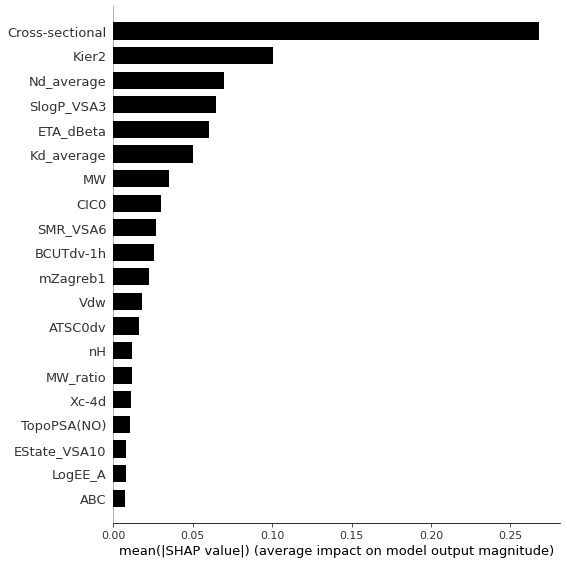

In [11]:
shap_values = explainer.shap_values(X)
ax =shap.summary_plot(shap_values, X_FEATURE , plot_type="bar", title='Train', max_display=30, show=False, color="k")
ax = plt.gca()
labels = [l.get_text() for l in ax.get_yticklabels()]
values = [rect.get_width() for rect in ax.patches]
df_feature = pd.DataFrame({'Labels': labels, 'Values': values})

print(df_feature)

20


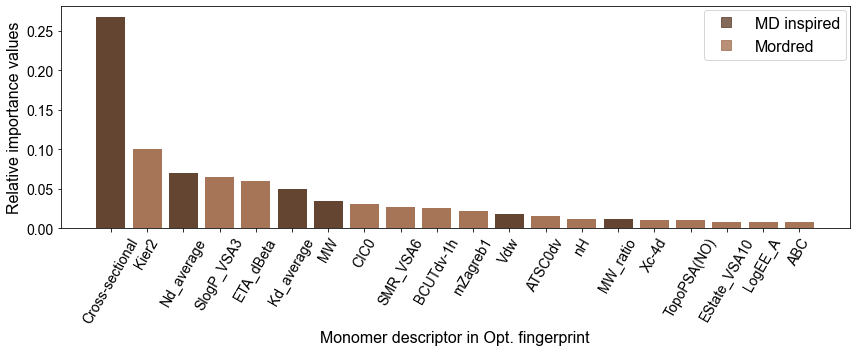

In [14]:
from matplotlib.lines import Line2D
importances = rfg.feature_importances_
print(len(importances))
indices = np.argsort(importances)
features =X_train.columns
plt.figure(figsize=(12,5))
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
pyhiscalfeature=['Cross-sectional','Kd_average','MW','MW_ratio', 'Nd_average','Vdw']
#plt.title('COE Feature importances')
colorbar=['#644532','#A67456']
colorlist1=[]
for feature in df_feature["Labels"]:
    if feature in pyhiscalfeature:
        colorlist1.append(colorbar[0])
    else:
        colorlist1.append(colorbar[1]) 
plt.bar(range(len(df_feature)),df_feature["Values"][::-1],color=colorlist1[::-1], align='center')  
plt.xticks(range(len(indices)),df_feature["Labels"][::-1], rotation=60,fontsize=14)
plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20,0.25], fontsize=14)
plt.ylabel('Relative importance values', font1)
plt.xlabel('Monomer descriptor in Opt. fingerprint',font1)
descriptor_name=["MD inspired","Mordred"]
label=[1,2]
legend_elements = []
legend_font = {'family' : 'Arial', 'weight' : 'normal', 'size': 16}
for label, name in enumerate(descriptor_name):
    legend_elements.append(Line2D(
        [0], [0], marker='s', lw=0, markersize=10,
        color=colorbar[label], label=name, alpha=0.8))
    #ax.legend(prop=legend_font,bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.2,handles=legend_elements)
    plt.legend(prop=legend_font,loc="best",borderaxespad=0.2,handles=legend_elements)
plt.tight_layout()
plt.show()

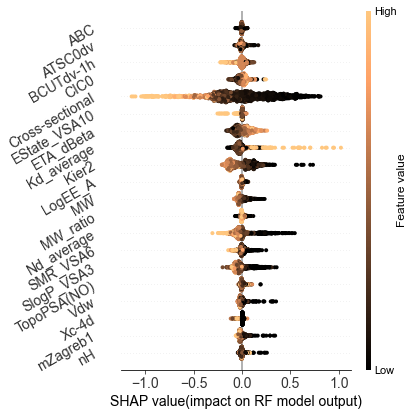

In [16]:
import matplotlib.cm as cm
plt.figure(figsize=(6,8.9))
ax=shap.summary_plot(shap_values,X_FEATURE,max_display = 50, show=False, cmap=cm.copper, plot_size=(6,6),sort=False)
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 14,
}
#cb=plt.colorbar(ax)
#cb.ax.tick_params(labelsize=14,length=10)
plt.rc('font', family='Arial')
plt.rcParams.update({'font.size':14})
#shap.summary_plot(shap_values,X_FEATURE,max_display = 50, show=False, cmap='copper', plot_size=(6,6),sort=False)
plt.tight_layout()
plt.xticks(fontproperties ='Arial', fontsize=14)
plt.yticks(fontproperties ='Arial', fontsize=14,rotation=30)
plt.xlabel('SHAP value(impact on RF model output)',font1)
plt.tight_layout()
plt.show()

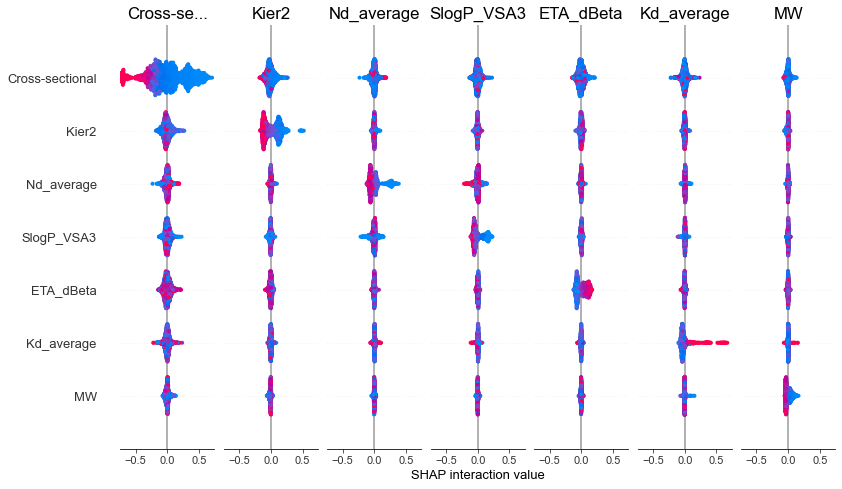

In [17]:
shap_interaction_values = explainer.shap_interaction_values(X_FEATURE)
shap.summary_plot(shap_interaction_values,X_FEATURE)

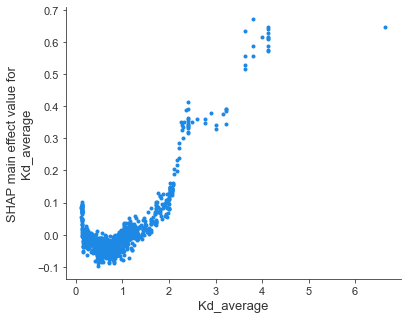

In [23]:
fig,ax = plt.subplots()
shap.dependence_plot(
    ('Kd_average','Kd_average'),
    shap_interaction_values,X_train,
    display_features=X_train,
    cmap='copper', show=False, ax=ax
)
plt.show()

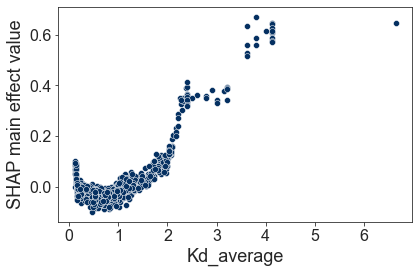

In [24]:
xdata=np.array(ax.collections[0].get_offsets())
ydata=np.ravel(xdata[:,1])
xdata=np.ravel(xdata[:,0])
xlabel=ax.collections[0].get_label()

import seaborn as sns
plt.figure(figsize=(6,4))
colorlist=['#053061']
sns.set_style('ticks')
sns.set_palette('copper')
ax=sns.scatterplot(x=xdata,
            y=ydata,
            #height=plt.rcParams['figure.figsize'][0],
            #aspect=plt.rcParams['figure.figsize'][1]/plt.rcParams['figure.figsize'][0])#,
            color=colorlist)#np.array(sn.color_palette())[4,:])
            #palette='copper')

#{'font.size': 10, 'figure.figsize': (6.0, 4.0), 'figure.facecolor': 'white', 'savefig.dpi': 72, 'figure.subplot.bottom': 0.125, 'figure.edgecolor': 'white'}
ax.set_xlabel('Kd_average',fontsize=18)
ax.set_ylabel('SHAP main effect value',fontsize=18)
#handles, labels = ax.get_legend_handles_labels()
#plt.legend(handles[:1], labels[:1], loc='upper right', frameon=True, markerscale=0.5, borderpad=0.2,
#           labelspacing=0.2, borderaxespad=0.3, handlelength=1)

plt.tight_layout()
plt.yticks(fontproperties = 'Arial', size = 16)
plt.xticks(fontproperties = 'Arial', size = 16)
plt.show()

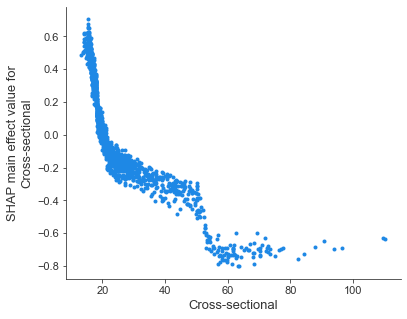

In [25]:
fig,ax = plt.subplots()
shap.dependence_plot(
    ('Cross-sectional','Cross-sectional'),
    shap_interaction_values,X_train,
    display_features=X_train,
    cmap='copper', show=False, ax=ax
)
plt.show()

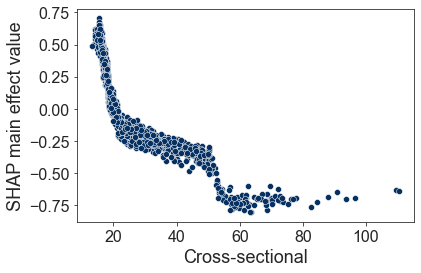

In [26]:
xdata=np.array(ax.collections[0].get_offsets())
ydata=np.ravel(xdata[:,1])
xdata=np.ravel(xdata[:,0])
xlabel=ax.collections[0].get_label()

import seaborn as sns
plt.figure(figsize=(6,4))
colorlist=['#053061']
sns.set_style('ticks')
sns.set_palette('copper')
ax=sns.scatterplot(x=xdata,
            y=ydata,
            #height=plt.rcParams['figure.figsize'][0],
            #aspect=plt.rcParams['figure.figsize'][1]/plt.rcParams['figure.figsize'][0])#,
            color=colorlist)#np.array(sn.color_palette())[4,:])
            #palette='copper')

#{'font.size': 10, 'figure.figsize': (6.0, 4.0), 'figure.facecolor': 'white', 'savefig.dpi': 72, 'figure.subplot.bottom': 0.125, 'figure.edgecolor': 'white'}
ax.set_xlabel('Cross-sectional',fontsize=18)
ax.set_ylabel('SHAP main effect value',fontsize=18)
#handles, labels = ax.get_legend_handles_labels()
#plt.legend(handles[:1], labels[:1], loc='upper right', frameon=True, markerscale=0.5, borderpad=0.2,
#           labelspacing=0.2, borderaxespad=0.3, handlelength=1)

plt.tight_layout()
plt.yticks(fontproperties = 'Arial', size = 16)
plt.xticks(fontproperties = 'Arial', size = 16)
plt.show()